<a href="https://colab.research.google.com/github/j0taerre/python/blob/main/Series_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Séries Temporais no PyCaret**

Aborda modelos clássicos - moving average, exponential smoothing, ARIMA, SARIMA, TBATS Machine Learning - Regression Linear, XGBoost, Random Forest, ou qualquer modelo de ML com método de Deep Learning - RNN, LSTM.

Fonte: Moex Ali (2021).

In [1]:
# !pip instal pycaret[full #pacote completo do PyCaret]
!pip install pycaret #pacote na versão slim (default)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.

In [2]:
!pip install pycaret-ts-alpha #pacote do Time Series do PyCarer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.1/468.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.1/303.1 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 75.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pycaret-ts-alpha to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 520.3/520.3 kB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 18.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem wi

In [3]:
import pandas as pd #importando a biblioteca de manipulação de dados

In [4]:
#Workflow
#Configuração, horizonte tempora (fh), modelos de comparação (30+ ARIMA a XGBoost), plot model (antes do treino serve como análise exploratória, usado com o modelo ajuda a avaliar o resíduo e ajustes), predict model

from pycaret.datasets import get_data
data = get_data('pycaret_downloads')

,Date,Total
0,7/8/2021,3773
1,7/9/2021,3172
2,7/10/2021,2079
3,7/11/2021,2725
4,7/12/2021,4542


In [5]:
#Preparando a base para o formato de dados diários referente ao número de downloads diários da biblioteca PyCaret
data['Date'] = pd.to_datetime(data['Date'])
data = data.groupby('Date').sum()
data = data.asfreq("D")
data.head()

,Total
Date,
2021-07-08,3773
2021-07-09,3172
2021-07-10,2079
2021-07-11,2725
2021-07-12,4542


<Axes: xlabel='Date'>

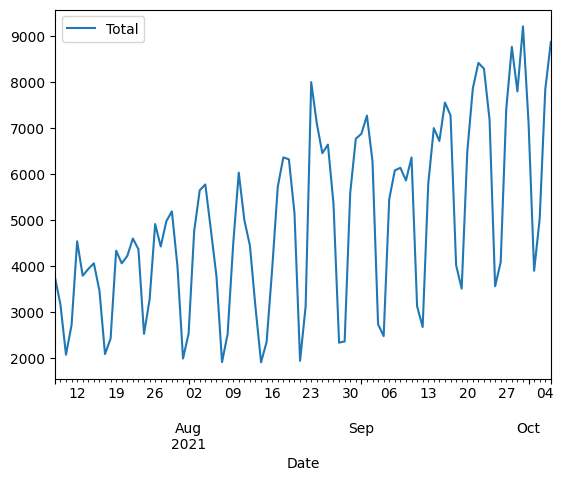

In [ ]:
#Plotando os dados
data.plot()

In [ ]:
#Configurando os dados
from pycaret.time_series import *
setup(data, fh = 7, fold = 5, session_id= 432)

,Description,Value
0,session_id,432
1,Target,Total
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(90, 1)"
5,Transformed data shape,"(90, 1)"
6,Transformed train set shape,"(83, 1)"
7,Transformed test set shape,"(7, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
#Avaliação Estatística
check_stats()

/usr/local/lib/python3.10/dist-packages/pycaret/internal/tests/time_series.py:396: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  results_ = kpss(data_, regression="ct", nlags="auto")


,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,90.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,4960.366667
3,Summary,Statistics,Transformed,Median,,4776.5
4,Summary,Statistics,Transformed,Standard Deviation,,1939.000116
5,Summary,Statistics,Transformed,Variance,,3759721.448315
6,Summary,Statistics,Transformed,Kurtosis,,-0.920113
7,Summary,Statistics,Transformed,Skewness,,0.22622
8,Summary,Statistics,Transformed,# Distinct Values,,89.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",293.08932


In [ ]:
#Análise dos dados
plot_model(plot = 'ts')

In [ ]:
#Plotagem ACF
plot_model(plot = 'acf')

In [ ]:
#Plotagem de diagnóstico
plot_model(plot = 'diagnostics')

In [ ]:
#Plotagem de Decomposição
plot_model(plot = 'decomp_stl')

In [ ]:
#Treinando o Modelo
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
auto_arima,Auto ARIMA,0.8998,0.7265,568.3725,674.8040,0.1111,0.1064,0.8481,2.9040
arima,ARIMA,0.9386,0.8116,592.3089,753.5740,0.1090,0.1046,0.7952,0.1180
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.9730,0.7888,613.4772,731.1559,0.1284,0.1204,0.8181,0.7180
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.9868,0.7969,622.9227,740.7492,0.1362,0.1239,0.8133,0.5400
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.9872,0.8037,623.2043,743.9335,0.1290,0.1225,0.8141,0.3000
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.9948,0.8187,627.7303,759.4915,0.1330,0.1235,0.8067,0.7940
theta,Theta Forecaster,1.0154,0.8267,640.3909,767.8655,0.1337,0.1277,0.7898,0.0560
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.0231,0.8316,645.4581,772.7425,0.1364,0.1269,0.7933,0.4340
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,1.0282,0.8599,648.3863,796.0600,0.1362,0.1289,0.7887,0.3920
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1.0355,0.8401,654.0131,778.1981,0.1388,0.1295,0.7985,0.3140


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pycaret/internal/pycaret_experiment/supervised_experiment.py:713: UserWarning:

Unsupported estimator `ensemble_forecaster` for method `compare_models()`, removing from model_library



In [ ]:
#Caso queira avaliar apenas um modelo. No caso vamos usar o "prophet", modelo criado pelo Facebook.
prophet = create_model('prophet')
print(prophet)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2021-08-24,1.1090,0.8013,707.5419,765.2254,0.1881,0.1691,0.8170
1,2021-08-31,1.3129,0.9414,838.8797,903.1969,0.1880,0.1757,0.7457
2,2021-09-07,0.9371,0.7150,579.0230,655.8323,0.1347,0.1232,0.8212
3,2021-09-14,1.0449,0.9101,641.2997,816.9058,0.1024,0.1088,0.7413
4,2021-09-21,1.3490,1.0889,870.3595,987.0928,0.1183,0.1250,0.7477
Mean,NaT,1.1506,0.8913,727.4207,825.6506,0.1463,0.1404,0.7746
SD,NaT,0.1576,0.1274,111.9719,113.7039,0.0356,0.0268,0.0364


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdakxr2wq/svod3fc_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdakxr2wq/oxxv4f42.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40827', 'data', 'file=/tmp/tmpdakxr2wq/svod3fc_.json', 'init=/tmp/tmpdakxr2wq/oxxv4f42.json', 'output', 'file=/tmp/tmpdakxr2wq/prophet_modelk01mll0y/prophet_model-20240520181944.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


ProphetPeriodPatched()


In [ ]:
plot_model(best, plot = 'forecast')

In [ ]:
#Prevendo além dos dados
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 30})

In [ ]:
#Previsão na mesma série
plot_model(best, plot = 'insample')

In [ ]:
#Modelo final
final_best = finalize_model(best)

In [ ]:
#Gerando valores preditos
predict_model(final_best, fh = 90)

,y_pred
2021-10-06,8392.9106
2021-10-07,9061.0286
2021-10-08,7701.1348
2021-10-09,4390.7421
2021-10-10,4972.7525
...,...
2021-12-30,13175.0354
2021-12-31,11815.1416
2022-01-01,8504.7489
2022-01-02,9086.7593


In [ ]:
#Salvando o modelo
save_model(final_best, 'my_best_model')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('model',
                                                                                                                                 AutoARIMA(random_state=432,
                                                                                                                                           sp=7,
                                                                                                                                           suppress_warnings=True))]))]))]))]),
 'my_best_model.pkl')